<a href="https://colab.research.google.com/github/PrudhviGowroju/Play-Store-App-Review-Analysis/blob/main/Prudhvi_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## Importing the data into data frame that is loading libraries



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


%matplotlib inline

## Mounting the Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading file path from our drive and checking the Info

In [3]:
file_path = '/content/drive/MyDrive/alma projects/Capstone Project/capstone database/Copy of Play Store Data.csv'
playstoredf=pd.read_csv(file_path)

In [4]:
playstoredf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Reviewing the dataframe

In [5]:
playstoredf.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [6]:
playstoredf.shape

(10841, 13)

## Data Cleaning

# Step 1 : We observed there is a invalid data in the Rating Series so deleting it we get rating column in a proper data set 

In [7]:
playstoredf[playstoredf['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
playstoredf= playstoredf.drop(10472)

## Step 2 : We observed some duplicates in App series so deleting it we get App column in a proper data set


In [9]:
playstoredf['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

In [10]:
playstoredf.drop_duplicates(['App'],inplace =True)
playstoredf['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
Tic Tac CK                                        1
INFAMY RO                                         1
CK Call NEW                                       1
Ck Coif                                           1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9659, dtype: int64

In [11]:
playstoredf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


## Step 3: Replacing , and + Values in Installs so that we can make it a proper data set

In [12]:
playstoredf['Reviews']=playstoredf['Reviews'].apply(lambda x:int(x))


In [13]:
playstoredf['Installs']=playstoredf['Installs'].apply(lambda x : x.replace(',',''))
playstoredf['Installs']=playstoredf['Installs'].apply(lambda x : x.replace('+',''))

## Step 4 : Making the Object Data Type to float or int

In [14]:
playstoredf['Installs']=playstoredf['Installs'].astype(dtype=float)

In [15]:
playstoredf[playstoredf['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,100000.0,Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,100000.0,Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,50000.0,Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,100000.0,Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,10000.0,Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,10000.0,Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100.0,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,5000.0,Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10.0,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


## Step 5 : Replacing Null Values with median

In [16]:
playstoredf['Rating'].median()

4.3

In [17]:
playstoredf.loc[playstoredf['Rating'].isnull(),'Rating']=playstoredf['Rating'].median()
playstoredf['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.3
10839    4.5
10840    4.5
Name: Rating, Length: 9659, dtype: float64

## Indexing only required data columns

In [18]:
playstoredf.loc[:,['App','Category',	'Rating'	,'Reviews'	,'Installs']]

,App,Category,Rating,Reviews,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000.0
...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,5000.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,100.0
10838,Parkinson Exercices FR,MEDICAL,4.3,3,1000.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,1000.0


## Creating a Scatter plot Category Wise Number of Installs with respect to Reviews and Ratings


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


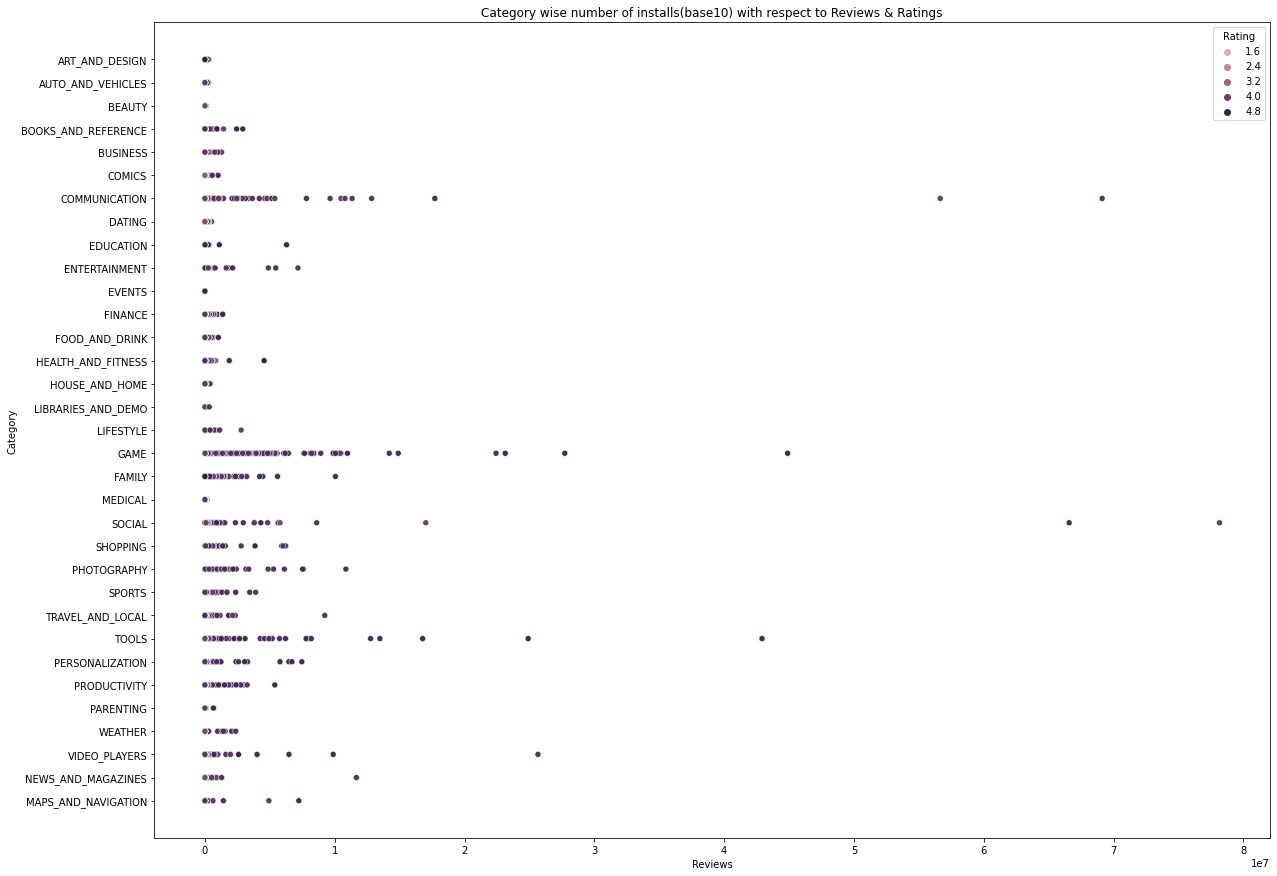

In [19]:
plt.figure(figsize=(20,15))
plt.title("Category wise number of installs(base10) with respect to Reviews & Ratings")
sns.scatterplot(playstoredf['Reviews'],playstoredf['Category'],playstoredf['Rating'],hue=playstoredf['Installs'])
plt.show()

## Filtering the Popular Apps by Ratings and its Reviews

In [20]:
popular_apps= playstoredf[(playstoredf['Rating']>4)&(playstoredf['Reviews']>1000)]
popular_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28M,1000000.0,Free,0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81M,1000000.0,Free,0,Teen,Action,"August 7, 2018",1.5.447,4.0 and up
10804,Poker Pro.Fr,GAME,4.2,5442,17M,100000.0,Free,0,Teen,Card,"May 22, 2018",4.1.3,2.3 and up
10809,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223,24M,1000000.0,Free,0,Everyone,Strategy,"July 18, 2018",1.4.2,4.1 and up
10815,Golden Dictionary (FR-AR),BOOKS_AND_REFERENCE,4.2,5775,4.9M,500000.0,Free,0,Everyone,Books & Reference,"July 19, 2018",7.0.4.6,4.2 and up


In [21]:
a= popular_apps.groupby('Category')['App'].count()
a

Category
ART_AND_DESIGN          24
AUTO_AND_VEHICLES       24
BEAUTY                  13
BOOKS_AND_REFERENCE     76
BUSINESS                77
COMICS                  23
COMMUNICATION          129
DATING                  40
EDUCATION               90
ENTERTAINMENT           66
EVENTS                  12
FAMILY                 623
FINANCE                118
FOOD_AND_DRINK          54
GAME                   598
HEALTH_AND_FITNESS     147
HOUSE_AND_HOME          30
LIBRARIES_AND_DEMO      16
LIFESTYLE               84
MAPS_AND_NAVIGATION     56
MEDICAL                 55
NEWS_AND_MAGAZINES      78
PARENTING               18
PERSONALIZATION        139
PHOTOGRAPHY            155
PRODUCTIVITY           158
SHOPPING               114
SOCIAL                 111
SPORTS                 132
TOOLS                  282
TRAVEL_AND_LOCAL        82
VIDEO_PLAYERS           73
WEATHER                 51
Name: App, dtype: int64

Text(0.5, 1.0, ' Category Wise Most Popular Apps')

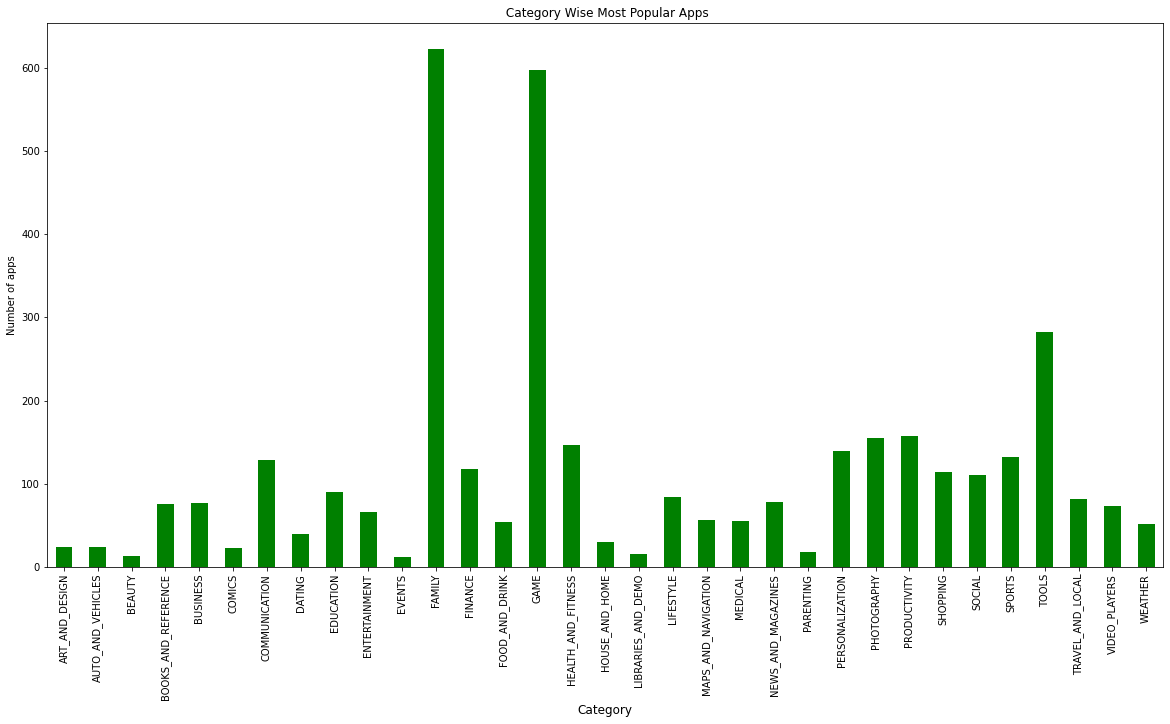

In [22]:
plt.rcParams['figure.figsize']=(20,10)
a.plot(kind='bar', color = 'green')
plt.xlabel('Category',fontsize=12)
plt.ylabel('Number of apps')
plt.title(' Category Wise Most Popular Apps')